# Wendigo EDA

### Contexto y Motivación

La música es uno de los lenguajes emocionales más universales, capaz de transmitir y evocar una amplia gama de sentimientos en los oyentes. Más allá de géneros y artistas, las canciones se conectan con nosotros a través de los estados de ánimo o "moods" que representan. En este análisis exploratorio de datos (EDA), nos sumergimos en la relación entre las letras de las canciones y los estados emocionales que transmiten, con el objetivo de comprender mejor cómo se codifican las emociones en la música popular.

Este proyecto surge como parte del desarrollo de Wendigo, un sistema de recomendación musical centrado en estados de ánimo, que busca conectar a los oyentes con canciones que reflejen su estado emocional deseado, trascendiendo las recomendaciones tradicionales basadas únicamente en géneros o similitud entre artistas.

### Datos Analizados

El dataset principal consiste en una amplia colección de más de 56,000 canciones, que incluye:

- Información básica de las canciones (título, artista)
- Letras completas para aproximadamente 5,000 canciones (8.9% del total)
- Clasificación de canciones en más de 300 categorías de "moods" distintos
- Relaciones entre canciones y múltiples estados de ánimo

Esta diversidad de datos nos permite explorar la expresión emocional desde múltiples ángulos, analizando desde la distribución estadística de moods hasta el contenido lingüístico específico de cada categoría emocional.

### Metodología del Análisis

Nuestro enfoque metodológico combina técnicas de:
  1. **Análisis estadístico descriptivo:** Para entender la distribución de canciones por mood y las co-ocurrencias entre diferentes estados de ánimo.

  2. **Procesamiento de lenguaje natural (NLP):** Aplicamos tokenización, eliminación de stopwords y análisis de frecuencia para identificar el vocabulario distintivo de cada mood.

  3. **Análisis de sentimiento:** Implementamos algoritmos como TextBlob y VADER para cuantificar la polaridad emocional (positiva/negativa) y la subjetividad de las letras.

  4. **Visualización de datos:** Empleamos nubes de palabras, gráficos de distribución y heatmaps para representar patrones y relaciones complejas.

### Preguntas de Investigación

Este EDA busca responder preguntas fundamentales como:

- ¿Existe una correspondencia directa entre el sentimiento expresado en las letras y los moods asignados a las canciones?
- ¿Qué vocabulario distintivo caracteriza a diferentes estados emocionales en la música?
- ¿Cómo varía la expresión emocional entre diferentes idiomas (inglés/español)?
- ¿Qué patrones de co-ocurrencia existen entre diferentes moods?
- ¿Qué nos revelan los casos de disonancia entre letra y clasificación emocional?

A través de este análisis, esperamos no solo mejorar los algoritmos de recomendación musical basados en emociones, sino también profundizar en la comprensión de cómo la música actúa como vehículo para la expresión emocional humana en diferentes contextos lingüísticos y culturales.

### Importación de Librerías
Importación de librerías esenciales para análisis de datos (pandas, numpy), visualización (matplotlib, seaborn), procesamiento de lenguaje natural (nltk, spacy) y análisis de sentimiento (textblob, vader).

In [52]:
# Instalar langdetect y modelos de spaCy para procesamiento de lenguaje natural
%pip install langdetect
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

# Importación de librerías esenciales para análisis de datos
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas y manejo de arrays

# Importación de librerías para visualización
import matplotlib.pyplot as plt  # Para crear gráficos básicos
import seaborn as sns  # Para gráficos estadísticos avanzados

# Importación de librerías para procesamiento de lenguaje natural
import nltk  # Para tareas de procesamiento de texto
from nltk.sentiment import SentimentIntensityAnalyzer  # Para análisis de sentimiento con VADER
import spacy  # Para análisis avanzado de texto

# Importación de librerías para análisis de sentimiento
from textblob import TextBlob  # Para análisis de sentimiento basado en reglas

# Descargar recursos necesarios para nltk
nltk.download('vader_lexicon')  # Descargar lexicón para análisis de sentimiento con VADER
nltk.download('punkt')  # Descargar tokenizer para procesamiento de texto con nltk

# Cargar modelo de lenguaje de spaCy
nlp_en = spacy.load('en_core_web_sm')  # Modelo en inglés para análisis de texto
nlp_es = spacy.load('es_core_news_sm')  # Modelo en español para análisis de texto

#Importar detector de idioma
import langdetect
from langdetect import detect

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 12.8/12.8 MB 89.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     -------------------------------- ------ 10.7/12.9 MB 51.4 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 47.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Determinar el idioma del texto en las letras de las canciones

Las letras de las canciones están en inglés y en español. Por lo que es necesario determinar el idioma de las letras para poder realizar el análisis de sentimiento.

In [53]:
# Función para determinar qué modelo usar según el idioma
def process_text(text):
    try:
        # Detectar idioma
        lang = detect(text)
        
        # Aplicar el modelo adecuado
        if lang == 'es':
            return nlp_es(text), 'es'
        else:  # Por defecto usar inglés
            return nlp_en(text), 'en'
    except Exception as e:
        print(f"Error procesando texto: {e}")
        # Si hay error en la detección, usar inglés por defecto
        return nlp_en(text), 'unknown'

# Función para análisis de sentimiento adaptada a ambos idiomas
def analyze_sentiment(text):
    try:
        lang = detect(text)
        
        if lang == 'es':
            # TextBlob para español
            blob = TextBlob(text)
            return {
                'polarity': blob.sentiment.polarity,
                'subjectivity': blob.sentiment.subjectivity,
                'lang': 'es'
            }
        else:
            # VADER para inglés
            sia = SentimentIntensityAnalyzer()
            sentiment = sia.polarity_scores(text)
            sentiment['lang'] = 'en'
            return sentiment
    except Exception as e:
        print(f"Error analizando sentimiento: {e}")
        # En caso de error, intentar con VADER
        sia = SentimentIntensityAnalyzer()
        sentiment = sia.polarity_scores(text)
        sentiment['lang'] = 'unknown'
        return sentiment

# Carga y Exploración Inicial de Datos
Carga de archivos CSV con información de canciones y letras. Exploración inicial para entender la estructura de datos, verificar valores faltantes y obtener estadísticas básicas.

In [16]:
import csv
# Cargar archivo CSV con información de canciones
songs_path = 'db/wendigosongs.csv'
albums_path = 'db/wendigoalbums.csv'
moods_path = 'db/wendigomoods.csv'
song_moods_path = 'db/wendigomoodsongs.csv'
artists_path = 'db/wendigoartist.csv'

#Cargar datasets
df_songs = pd.read_csv(songs_path,
                       quoting=csv.QUOTE_MINIMAL, 
                       escapechar='\\', 
                       quotechar='"', 
                       on_bad_lines='skip')

df_albums = pd.read_csv(albums_path,
                        quoting=csv.QUOTE_MINIMAL,
                        escapechar='\\',
                        quotechar='"',
                        on_bad_lines='skip')

df_moods = pd.read_csv(moods_path,
                       quoting=csv.QUOTE_MINIMAL,
                       escapechar='\\',
                       quotechar='"',
                       on_bad_lines='skip')

df_song_moods = pd.read_csv(song_moods_path,
                        quoting=csv.QUOTE_MINIMAL,
                        escapechar='\\',
                        quotechar='"',
                        on_bad_lines='skip')

df_artists = pd.read_csv(artists_path,
                         quoting=csv.QUOTE_MINIMAL,
                         escapechar='\\',
                         quotechar='"',
                         on_bad_lines='skip')

# Mostrar los primeros registros de cada dataset
print("=== Información de canciones ===")
print(f"Dimensiones: {df_songs.shape}")
print(df_songs.info())
print("\nPrimeras 5 filas:")
display(df_songs.head())

print("\n=== Información del dataset de álbumes ===")
print(f"Dimensiones: {df_albums.shape}")
print(df_albums.info())
print("\nPrimeras 5 filas:")
display(df_albums.head())

print("\n=== Información del dataset de moods ===")
print(f"Dimensiones: {df_moods.shape}")
print(df_moods.info())
print("\nPrimeras 5 filas:")
display(df_moods.head())

print("\n=== Información del dataset de relación canciones-moods ===")
print(f"Dimensiones: {df_song_moods.shape}")
print(df_song_moods.info())
print("\nPrimeras 5 filas:")
display(df_song_moods.head())

print("\n=== Información del dataset de artistas ===")
print(f"Dimensiones: {df_artists.shape}")
print(df_artists.info())
print("\nPrimeras 5 filas:")
display(df_artists.head())



=== Información de canciones ===
Dimensiones: (56291, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56291 entries, 0 to 56290
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           55817 non-null  object
 1   name         13407 non-null  object
 2   youtube_url  3711 non-null   object
 3   spotify_id   1459 non-null   object
 4   created_at   6745 non-null   object
 5   lyrics       4985 non-null   object
 6   genre        461 non-null    object
 7   bpm          5583 non-null   object
 8   artist       5436 non-null   object
dtypes: object(9)
memory usage: 3.9+ MB
None

Primeras 5 filas:


,id,name,youtube_url,spotify_id,created_at,lyrics,genre,bpm,artist
0,13,Lose Yourself,https://www.allmusic.com/artist/eminem-mn00001...,NaN,2025-03-24 13:24:24,"Look, if you had one shot or one opportunity\n...",NaN,0,Eminem
1,14,(I Can't Get No) Satisfaction,https://www.allmusic.com/artist/the-rolling-st...,NaN,2025-03-24 13:24:24,I can't get no satisfaction\nI can't get no sa...,NaN,0,The Rolling Stones
2,15,Black Hole Sun,https://www.allmusic.com/artist/soundgarden-mn...,NaN,2025-03-24 13:24:24,"In my eyes, indisposed\nIn disguises no one kn...",NaN,0,Soundgarden
3,16,Maybellene,https://www.allmusic.com/artist/chuck-berry-mn...,NaN,2025-03-24 13:24:24,"Maybellene, why can't you be true?\nOh, Maybel...",NaN,0,Chuck Berry
4,17,Cinnamon Girl,https://www.allmusic.com/artist/crazy-horse-mn...,NaN,2025-03-24 13:24:24,I wanna live with a cinnamon girl\nI could be ...,NaN,0,Crazy Horse



=== Información del dataset de álbumes ===
Dimensiones: (1182, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1182 non-null   int64  
 1   name       1182 non-null   object 
 2   artist     0 non-null      float64
 3   cover_url  1182 non-null   object 
 4   album_url  0 non-null      float64
 5   buy_url    1182 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 55.5+ KB
None

Primeras 5 filas:


,id,name,artist,cover_url,album_url,buy_url
0,2,Curtain Call: The Hits,NaN,https://fastly-s3.allmusic.com/release/mr00036...,NaN,https://www.allmusic.com/album/curtain-call-th...
1,3,Forty Licks,NaN,https://fastly-s3.allmusic.com/release/mr00003...,NaN,https://www.allmusic.com/album/forty-licks-mw0...
2,4,Superunknown,NaN,https://fastly-s3.allmusic.com/release/mr00037...,NaN,https://www.allmusic.com/album/superunknown-mw...
3,5,The Definitive Collection,NaN,https://fastly-s3.allmusic.com/release/mr00010...,NaN,https://www.allmusic.com/album/the-definitive-...
4,6,Greatest Hits,NaN,https://fastly-s3.allmusic.com/release/mr00008...,NaN,https://www.allmusic.com/album/greatest-hits-m...



=== Información del dataset de moods ===
Dimensiones: (305, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      305 non-null    int64 
 1   name    305 non-null    object
 2   url     305 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.3+ KB
None

Primeras 5 filas:


,id,name,url
0,7,Acerbic,https://www.allmusic.com/mood/acerbic-xa000000...
1,8,Aggressive,https://www.allmusic.com/mood/aggressive-xa000...
2,9,Agreeable,https://www.allmusic.com/mood/agreeable-xa0000...
3,10,Airy,https://www.allmusic.com/mood/airy-xa0000000932
4,11,Ambitious,https://www.allmusic.com/mood/ambitious-xa0000...



=== Información del dataset de relación canciones-moods ===
Dimensiones: (15791, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15791 entries, 0 to 15790
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       15791 non-null  int64
 1   mood_id  15791 non-null  int64
 2   song_id  15791 non-null  int64
dtypes: int64(3)
memory usage: 370.2 KB
None

Primeras 5 filas:


,id,mood_id,song_id
0,13,7,13
1,14,7,14
2,15,7,15
3,16,7,16
4,17,7,17



=== Información del dataset de artistas ===
Dimensiones: (950, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      950 non-null    int64 
 1   name    950 non-null    object
 2   url     950 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.4+ KB
None

Primeras 5 filas:


,id,name,url
0,15,Eminem,https://www.allmusic.com/artist/eminem-mn00001...
1,16,The Rolling Stones,https://www.allmusic.com/artist/the-rolling-st...
2,17,Soundgarden,https://www.allmusic.com/artist/soundgarden-mn...
3,18,Chuck Berry,https://www.allmusic.com/artist/chuck-berry-mn...
4,19,Neil Young,https://www.allmusic.com/artist/neil-young-mn0...


In [17]:
# Verificar la columna de letras
print("=== Análisis de letras de canciones ===")
print(f"Número de canciones con letras: {df_songs['lyrics'].notna().sum()} de {len(df_songs)}")

# Muestra de una letra de canción
print("\nEjemplo de letra de canción:")
sample_lyrics = df_songs.loc[df_songs['lyrics'].notna()].iloc[0]['lyrics']
print(sample_lyrics[:500] + "..." if len(str(sample_lyrics)) > 500 else sample_lyrics)

=== Análisis de letras de canciones ===
Número de canciones con letras: 4985 de 56291

Ejemplo de letra de canción:
Look, if you had one shot or one opportunity
To seize everything you ever wanted in one moment
Would you capture it or just let it slip?
Yo

His palms are sweaty, knees weak, arms are heavy
There's vomit on his sweater already, mom's spaghetti
He's nervous, but on the surface, he looks calm and ready
To drop bombs, but he keeps on forgetting
What he wrote down, the whole crowd goes so loud
He opens his mouth, but the words won't come out
He's chokin', how? Everybody's jokin' now
The clock's run ...


# Limpieza y Preprocesamiento de Datos
Limpieza del dataset manejando valores faltantes, eliminando duplicados y estandarizando formatos. Preparación de los datos para análisis posterior.

In [23]:
# 1. Verificar valores faltantes en cada dataset
print("=== Verificación de valores faltantes ===")
print("\nCanciones:")
print(df_songs.isnull().sum())
print("\nÁlbumes:")
print(df_albums.isnull().sum())
print("\nMoods:")
print(df_moods.isnull().sum())
print("\nRelaciones Canción-Mood:")
print(df_song_moods.isnull().sum())
print("\nArtistas:")
print(df_artists.isnull().sum())

=== Verificación de valores faltantes ===

Canciones:
id                  0
name            42884
youtube_url     52580
spotify_id      54832
created_at      49546
lyrics          51306
genre           55830
bpm             50708
artist          50855
lyrics_clean    51306
dtype: int64

Álbumes:
id              0
name            0
artist       1182
cover_url       0
album_url    1182
buy_url         0
dtype: int64

Moods:
id      0
name    0
url     0
dtype: int64

Relaciones Canción-Mood:
id         0
mood_id    0
song_id    0
dtype: int64

Artistas:
id      0
name    0
url     0
dtype: int64


In [24]:

# 2. Verificar duplicados en cada dataset
print("\n=== Verificación de duplicados ===")
print(f"Canciones - Filas duplicadas: {df_songs.duplicated().sum()}")
print(f"Álbumes - Filas duplicadas: {df_albums.duplicated().sum()}")
print(f"Moods - Filas duplicadas: {df_moods.duplicated().sum()}")
print(f"Relaciones Canción-Mood - Filas duplicadas: {df_song_moods.duplicated().sum()}")
print(f"Artistas - Filas duplicadas: {df_artists.duplicated().sum()}")


=== Verificación de duplicados ===
Canciones - Filas duplicadas: 18751
Álbumes - Filas duplicadas: 0
Moods - Filas duplicadas: 0
Relaciones Canción-Mood - Filas duplicadas: 0
Artistas - Filas duplicadas: 0


In [27]:


# 3. Limpieza y preprocesamiento de letras de canciones
# Primero verificamos cuántas canciones tienen letras
letras_disponibles = df_songs['lyrics'].notna().sum()
total_canciones = len(df_songs)
print(f"\n=== Letras de canciones ===")
print(f"Canciones con letras: {letras_disponibles} de {total_canciones} ({letras_disponibles/total_canciones*100:.1f}%)")

# 4. Limpieza básica de letras (para canciones que tienen letras)
def limpiar_letra(texto):
    if pd.isna(texto):
        return texto
    
    # Convertir a minúsculas
    texto = str(texto).lower()
    
    # Eliminar saltos de línea múltiples y espacios extras
    texto = ' '.join(texto.split())
    
    return texto

# Crear una copia de las letras originales y aplicar limpieza básica
df_songs['lyrics_clean'] = df_songs['lyrics'].apply(limpiar_letra)




=== Letras de canciones ===
Canciones con letras: 4985 de 56291 (8.9%)


In [28]:

# 5. Mostrar ejemplo de letra original vs limpiada
if letras_disponibles > 0:
    idx = df_songs['lyrics'].first_valid_index()
    if idx is not None:
        original = df_songs.loc[idx, 'lyrics']
        limpiada = df_songs.loc[idx, 'lyrics_clean']
        
        print("\n=== Ejemplo de limpieza de letra ===")
        print("ORIGINAL (primeros 200 caracteres):")
        print(str(original)[:200] + "..." if len(str(original)) > 200 else original)
        print("\nLIMPIADA (primeros 200 caracteres):")
        print(str(limpiada)[:200] + "..." if len(str(limpiada)) > 200 else limpiada)




=== Ejemplo de limpieza de letra ===
ORIGINAL (primeros 200 caracteres):
Look, if you had one shot or one opportunity
To seize everything you ever wanted in one moment
Would you capture it or just let it slip?
Yo

His palms are sweaty, knees weak, arms are heavy
There's vo...

LIMPIADA (primeros 200 caracteres):
look, if you had one shot or one opportunity to seize everything you ever wanted in one moment would you capture it or just let it slip? yo his palms are sweaty, knees weak, arms are heavy there's vom...


In [29]:

# 6. Comprobar consistencia entre datasets relacionados
print("\n=== Verificación de integridad entre datasets ===")

# Verificar si todos los song_id en song_moods existen en songs
song_ids_en_song_moods = set(df_song_moods['song_id'].unique())
song_ids_en_songs = set(df_songs['id'].unique())
songs_faltantes = song_ids_en_song_moods - song_ids_en_songs

print(f"Canciones referenciadas en moods pero no en dataset de canciones: {len(songs_faltantes)}")

# Verificar si todos los mood_id en song_moods existen en moods
mood_ids_en_song_moods = set(df_song_moods['mood_id'].unique())
mood_ids_en_moods = set(df_moods['id'].unique())
moods_faltantes = mood_ids_en_song_moods - mood_ids_en_moods

print(f"Moods referenciados en relaciones pero no en dataset de moods: {len(moods_faltantes)}")




=== Verificación de integridad entre datasets ===
Canciones referenciadas en moods pero no en dataset de canciones: 76
Moods referenciados en relaciones pero no en dataset de moods: 0


### Resumen final de limpieza de datos

In [ ]:
print("\n=== Resumen de datos limpios ===")
print(f"Canciones: {len(df_songs)} registros")
print(f"Álbumes: {len(df_albums)} registros")
print(f"Moods: {len(df_moods)} registros")
print(f"Relaciones Canción-Mood: {len(df_song_moods)} registros")
print(f"Artistas: {len(df_artists)} registros")


=== Resumen de datos limpios ===
Canciones: 56291 registros
Álbumes: 1182 registros
Moods: 305 registros
Relaciones Canción-Mood: 15791 registros
Artistas: 950 registros


# Análisis Exploratorio de Relaciones Música-Mood
Análisis de la distribución de canciones por diferentes moods. Exploración de relaciones entre atributos musicales y clasificaciones de mood mediante gráficos y estadísticas.

Tipo de datos en df_song_moods['song_id']: object
Tipo de datos en df_songs['id']: object
Tipo de datos en df_moods['id']: object
=== Distribución de canciones por mood ===
Top 10 moods más comunes:


,name,count
272,Acerbic,91
241,Calm/Peaceful,87
29,Hungry,86
238,Bright,85
270,Detached,79
50,Lazy,79
167,Soft/Quiet,77
62,Malevolent,76
143,Austere,75
72,Menacing,75


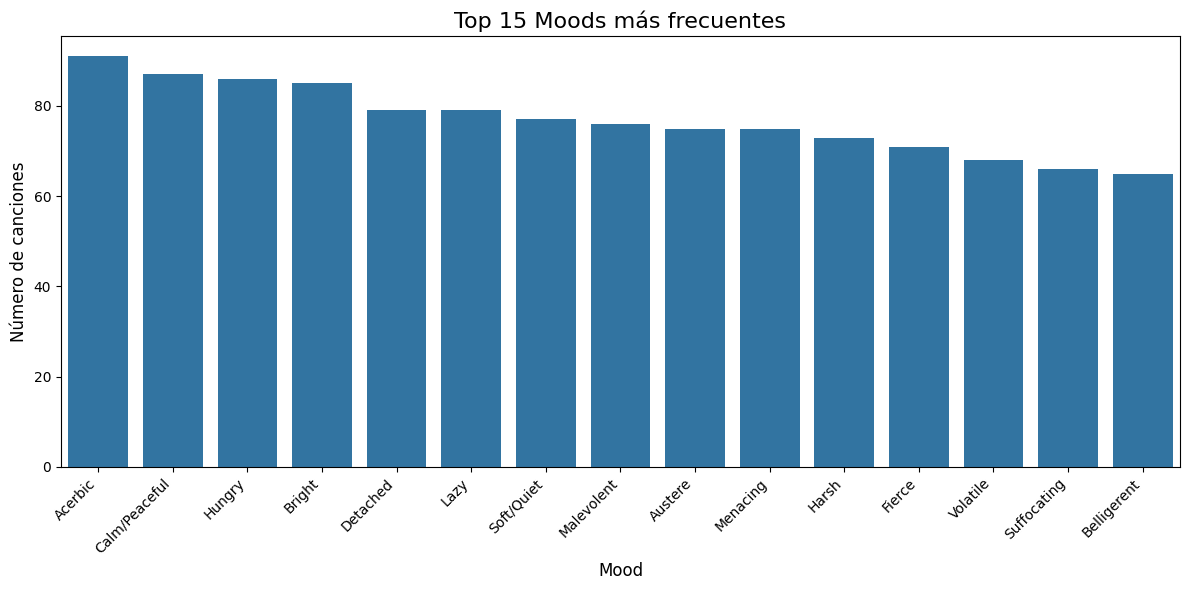

In [34]:
# Verificar tipos de datos antes de hacer los merge
print("Tipo de datos en df_song_moods['song_id']:", df_song_moods['song_id'].dtype)
print("Tipo de datos en df_songs['id']:", df_songs['id'].dtype)
print("Tipo de datos en df_moods['id']:", df_moods['id'].dtype)

# Convertir las columnas a string para asegurar compatibilidad
df_song_moods['song_id'] = df_song_moods['song_id'].astype(str)
df_songs['id'] = df_songs['id'].astype(str)
df_song_moods['mood_id'] = df_song_moods['mood_id'].astype(str)
df_moods['id'] = df_moods['id'].astype(str)

# 1. Distribución de canciones por mood
print("=== Distribución de canciones por mood ===")

# Contar canciones por mood
mood_counts = df_song_moods.groupby('mood_id').size().reset_index(name='count')
# Unir con nombres de moods
mood_counts = mood_counts.merge(df_moods, left_on='mood_id', right_on='id')
# Ordenar por cantidad descendente
mood_counts = mood_counts.sort_values('count', ascending=False)

print(f"Top 10 moods más comunes:")
display(mood_counts[['name', 'count']].head(10))

# Visualizar distribución de top moods
plt.figure(figsize=(12, 6))
top_moods = mood_counts.head(15)
sns.barplot(x='name', y='count', data=top_moods)
plt.title('Top 15 Moods más frecuentes', fontsize=16)
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Número de canciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



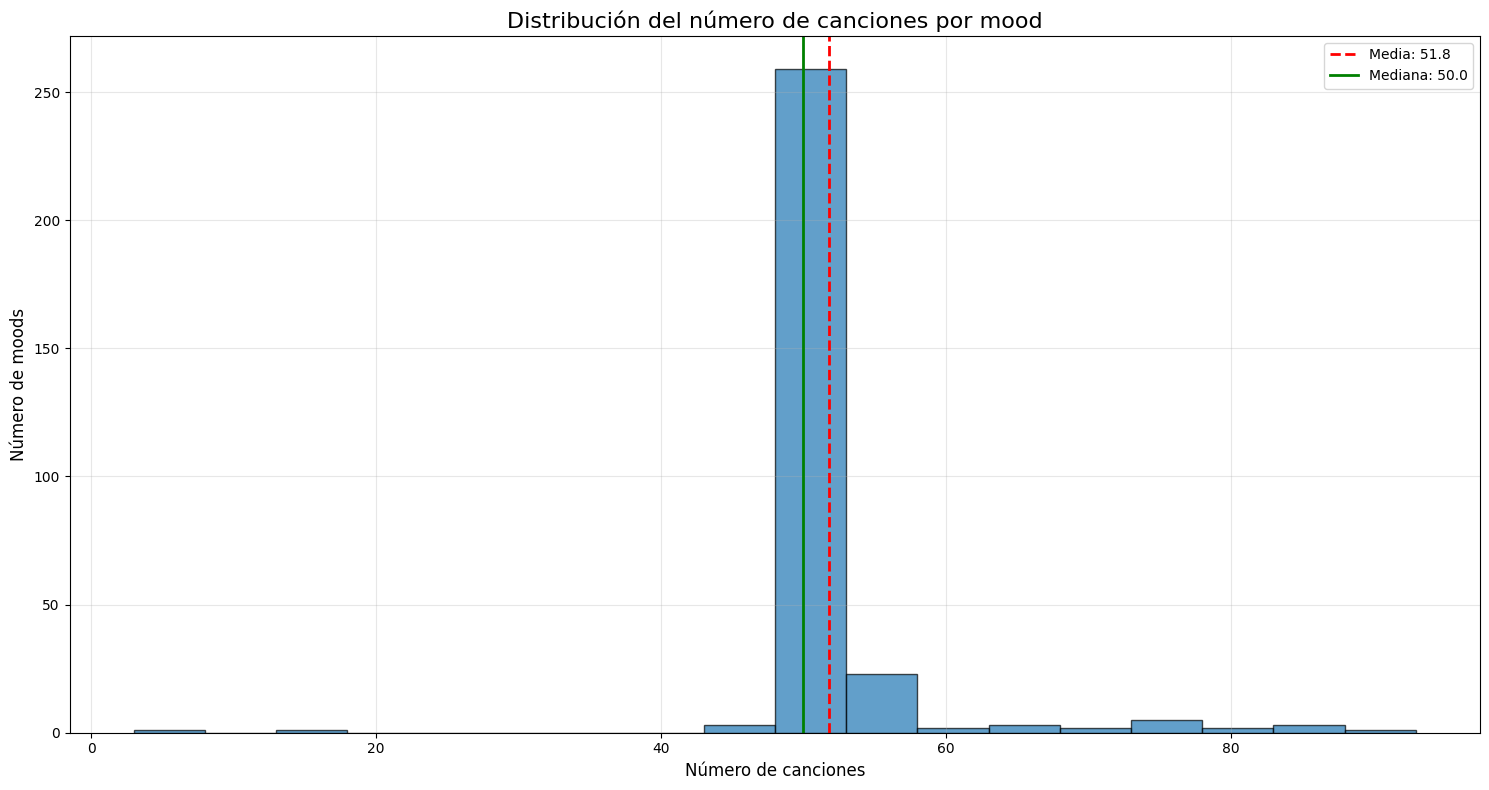

In [35]:
# 2. Mostrar la distribución completa de canciones por mood (no solo los top 15)
plt.figure(figsize=(15, 8))

# Crear un histograma más detallado con mejores tamaños de bin
counts = mood_counts['count']
bins = np.arange(counts.min(), counts.max() + 5, 5)  # bins de tamaño 5

plt.hist(counts, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribución del número de canciones por mood', fontsize=16)
plt.xlabel('Número de canciones', fontsize=12)
plt.ylabel('Número de moods', fontsize=12)
plt.grid(True, alpha=0.3)

# Añadir una línea vertical para la media
plt.axvline(x=counts.mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Media: {counts.mean():.1f}')

# Añadir una línea vertical para la mediana
plt.axvline(x=counts.median(), color='green', linestyle='-', 
           linewidth=2, label=f'Mediana: {counts.median():.1f}')

plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# 3. Estadísticas sobre canciones por mood
print("\n=== Estadísticas de canciones por mood ===")
print(f"Promedio de canciones por mood: {mood_counts['count'].mean():.2f}")
print(f"Mediana de canciones por mood: {mood_counts['count'].median()}")
print(f"Moda de canciones por mood: {mood_counts['count'].mode().values[0]}")
print(f"Máximo de canciones por mood: {mood_counts['count'].max()}")
print(f"Mínimo de canciones por mood: {mood_counts['count'].min()}")
print(f"Desviación estándar: {mood_counts['count'].std():.2f}")


=== Estadísticas de canciones por mood ===
Promedio de canciones por mood: 51.77
Mediana de canciones por mood: 50.0
Moda de canciones por mood: 50
Máximo de canciones por mood: 91
Mínimo de canciones por mood: 3
Desviación estándar: 7.06


In [37]:
# 4. Crear dataset unificado con información de canciones y sus moods
songs_with_moods = df_song_moods.merge(df_songs, left_on='song_id', right_on='id')
songs_with_moods = songs_with_moods.merge(df_moods, left_on='mood_id', right_on='id', 
                                         suffixes=('_song', '_mood'))

In [38]:
# 5. Encontrar moods que suelen aparecer juntos (co-ocurrencia)
print("\n=== Análisis de co-ocurrencia de moods ===")

# Obtener pares de moods que aparecen en las mismas canciones
mood_pairs = []
for song_id in df_song_moods['song_id'].unique():
    moods = df_song_moods[df_song_moods['song_id'] == song_id]['mood_id'].tolist()
    if len(moods) > 1:
        for i in range(len(moods)):
            for j in range(i+1, len(moods)):
                mood_pairs.append(tuple(sorted([moods[i], moods[j]])))

# Contar frecuencia de cada par de moods
mood_pair_counts = pd.Series(mood_pairs).value_counts().reset_index()
mood_pair_counts.columns = ['mood_pair', 'frequency']

# Obtener nombres de los moods para los pares más frecuentes
if len(mood_pair_counts) > 0:
    top_pairs = mood_pair_counts.head(10)
    print("Top 10 combinaciones de moods más frecuentes:")
    
    for _, row in top_pairs.iterrows():
        mood_id1, mood_id2 = row['mood_pair']
        mood_name1 = df_moods[df_moods['id'] == mood_id1]['name'].values[0]
        mood_name2 = df_moods[df_moods['id'] == mood_id2]['name'].values[0]
        print(f"{mood_name1} + {mood_name2}: {row['frequency']} canciones")


=== Análisis de co-ocurrencia de moods ===
Top 10 combinaciones de moods más frecuentes:
Poignant + Wistful: 33 canciones
Cerebral + Complex: 32 canciones
Plaintive + Wistful: 31 canciones
Refined + Sophisticated: 30 canciones
Fun + Cheerful: 29 canciones
Confident + Exuberant: 29 canciones
Cheerful + Confident: 29 canciones
Freewheeling + Confident: 29 canciones
Freewheeling + Earthy: 28 canciones
Freewheeling + Exuberant: 27 canciones


In [39]:
# 6. Explorar artistas por mood (excluir Acerbic que es muestra control)
print("\n=== Análisis de artistas por mood ===")

# Excluir Acerbic y tomar los siguientes 5 moods más comunes
acerbic_id = df_moods[df_moods['name'] == 'Acerbic']['id'].values[0]
top_moods_ex_acerbic = mood_counts[mood_counts['mood_id'] != acerbic_id].head(5)

# Contar artistas más frecuentes para cada mood usando directamente la columna 'artist'
for _, mood_row in top_moods_ex_acerbic.iterrows():
    mood_id = mood_row['mood_id']
    mood_name = mood_row['name']
    
    # Filtrar canciones por el mood actual
    mood_songs = songs_with_moods[songs_with_moods['mood_id'] == mood_id]
    
    # Si existe la columna 'artist', usarla para contar
    if 'artist' in mood_songs.columns:
        # Contamos artistas más frecuentes sin incluir valores nulos
        artist_counts = mood_songs['artist'].dropna().value_counts().head(5)
        
        print(f"\nTop 5 artistas para mood '{mood_name}' ({mood_row['count']} canciones):")
        if len(artist_counts) > 0:
            for artist, count in artist_counts.items():
                print(f"  - {artist}: {count} canciones")
        else:
            print("  No hay datos de artistas disponibles para este mood")
    else:
        print(f"\nNo hay información de artistas disponible para el mood '{mood_name}'")


=== Análisis de artistas por mood ===

Top 5 artistas para mood 'Calm/Peaceful' (87 canciones):
  - Bill Evans Trio: 4 canciones
  - Willie Nelson: 4 canciones
  - Dolly Parton: 3 canciones
  - Enya: 3 canciones
  - Van Morrison: 2 canciones

Top 5 artistas para mood 'Hungry' (86 canciones):
  - Elvis Presley: 15 canciones
  - Otis Redding: 10 canciones
  - Hank Williams: 9 canciones
  - Al Green: 6 canciones
  - Faron Young: 5 canciones

Top 5 artistas para mood 'Bright' (85 canciones):
  - Dean Martin: 2 canciones
  - Lonnie Johnson: 2 canciones
  - Elvis Presley: 2 canciones
  - Aerosmith: 2 canciones
  - Ray Conniff: 2 canciones

Top 5 artistas para mood 'Detached' (79 canciones):
  - Depeche Mode: 4 canciones
  - Moby: 4 canciones
  - Merle Haggard: 3 canciones
  - Enya: 3 canciones
  - David Bowie: 3 canciones

Top 5 artistas para mood 'Lazy' (79 canciones):
  - Jimmy Reed: 8 canciones
  - Dean Martin: 6 canciones
  - T-Bone Walker: 6 canciones
  - Bob Marley: 5 canciones
  - Ch

# Preprocesamiento de Letras de Canciones
Preprocesamiento de letras eliminando stopwords, signos de puntuación y aplicando tokenización. Creación de distribuciones de frecuencia de palabras y visualización con nubes de palabras por cada mood.

In [40]:
# Instalar wordcloud si no está instalado
%pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ....
[nltk_data]   Package stopwords is already up-to-date!


Idiomas disponibles para stopwords: ['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']
Total de canciones: 56291
Canciones con letras: 4985

Canciones con letras y clasificación por mood: 11951
Moods encontrados para análisis: ['Angry', 'Sad', 'Happy', 'Sexy', 'Sexual', 'Aggressive', 'Fun', 'Gloomy']

=== Top 10 palabras para mood 'Angry' (Total canciones: 53) ===
  - day: 48
  - new: 43
  - rising: 29
  - never: 27
  - rise: 26
  - let: 22
  - way: 22
  - kill: 21
  - london: 20
  - right: 20

=== Top 10 palabras para mood 'Sad' (Total canciones: 49) ===
  - love: 43
  - never: 31
  - time: 31
  - day: 30
  - let: 24
  - monday: 23
  - back: 20
  - way: 20
  - long: 18
  - pink: 18

=

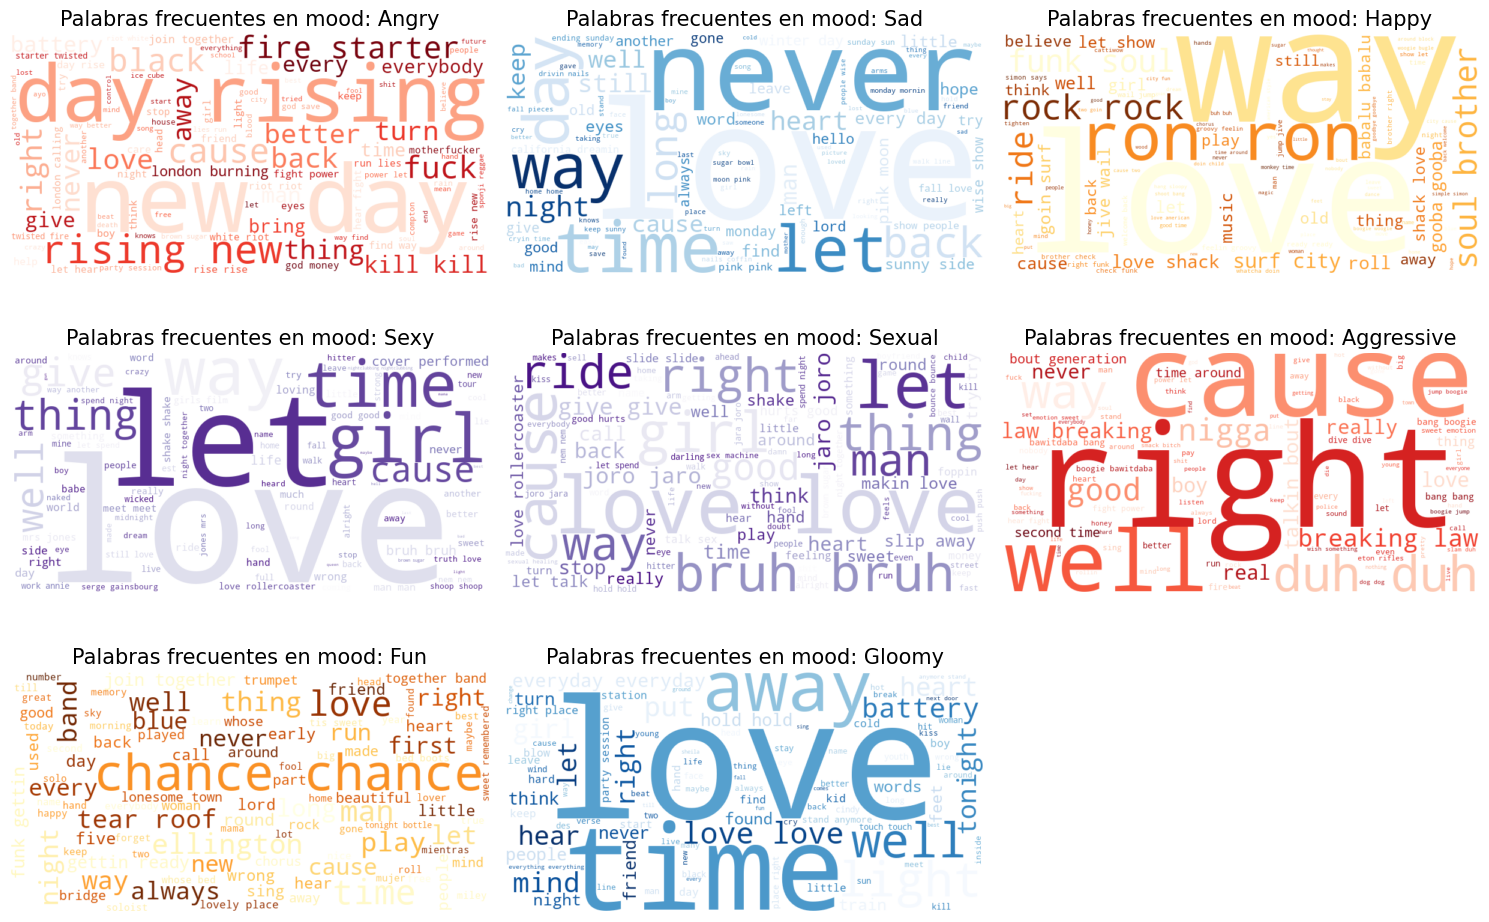

<Figure size 1400x800 with 0 Axes>

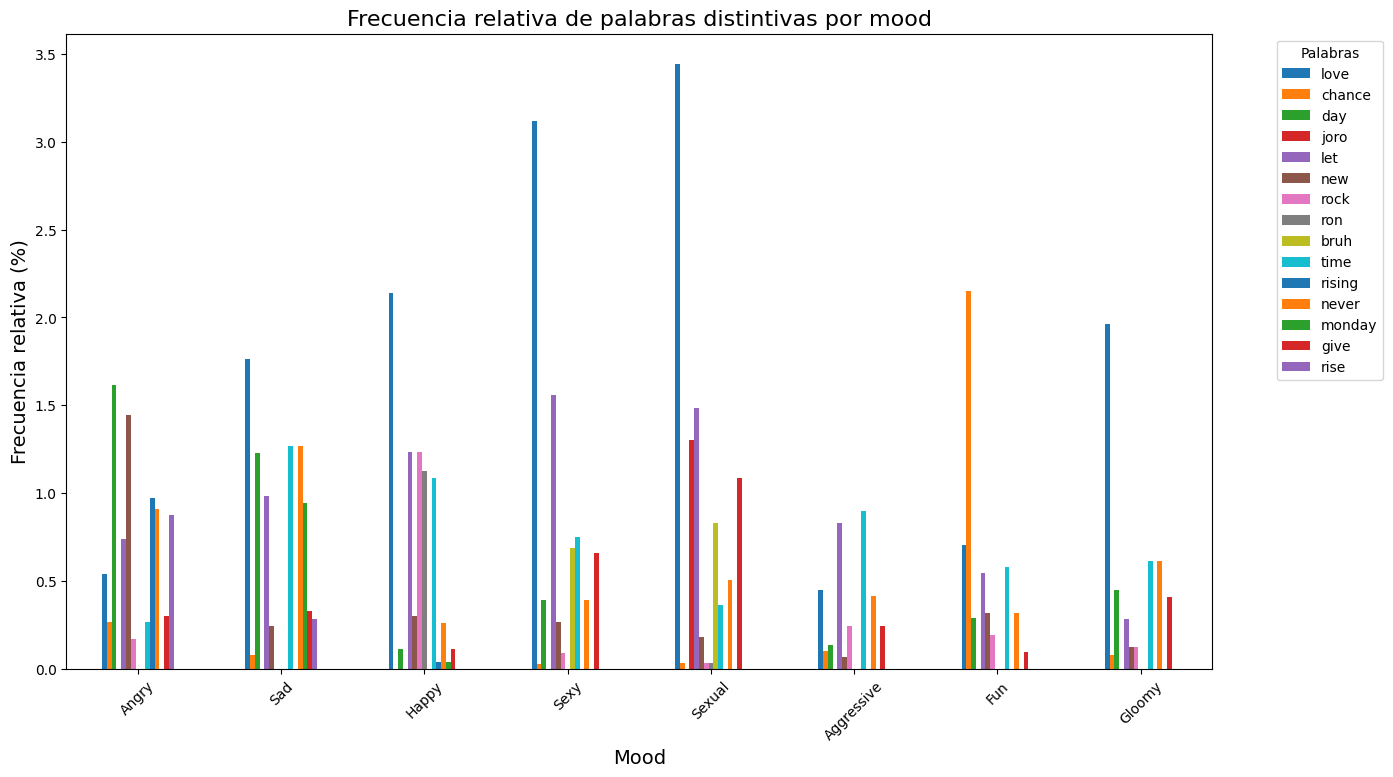

In [50]:
# Importaciones necesarias
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Descargar stopwords si no lo has hecho ya
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords', download_dir='.')

# Verificar qué idiomas están disponibles para stopwords
available_langs = stopwords.fileids()
print("Idiomas disponibles para stopwords:", available_langs)

# Lista extendida de stopwords que incluye palabras de música y onomatopeyas
extended_stopwords = {
    # Stopwords en inglés básicas
    'the', 'and', 'to', 'of', 'a', 'in', 'that', 'is', 'it', 'for', 'with', 'as', 'was', 
    'be', 'this', 'have', 'from', 'or', 'one', 'had', 'by', 'but', 'not', 'what', 'all',
    
    # Stopwords en español básicas
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'y', 'o', 'pero', 'si', 
    'de', 'del', 'al', 'a', 'ante', 'con', 'en', 'para', 'por', 'según', 'sin', 'sobre',
    'tras', 'que', 'cual', 'cuando', 'como', 'donde', 'quien', 'cuyo',
    'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas',
    'mi', 'tu', 'su', 'mis', 'tus', 'sus', 'nuestro', 'vuestro', 
    'yo', 'me', 'nos', 'te', 'os', 'se', 'le', 'les', 'porque', 'pues',
    
    # Onomatopeyas y palabras repetitivas en canciones
    'yeah', 'oh', 'ah', 'hey', 'like', 'just', 'wah', 'wow', 'ooh', 'uhh', 'mmm',
    'nah', 'na', 'la', 'da', 'ba', 'ra', 'doo', 'boo', 'hoo', 'yea', 'woah', 
    'whoa', 'baby', 'boom', 'sha', 'dum', 'mmm', 'bam', 'huh',
    
    # Variaciones y formas con repetición
    'ohhh', 'ohh', 'ahhh', 'ahh', 'yeahh', 'yeahhh', 'nope', 'nopeee', 'naa',
    'naah', 'naaa', 'naaah', 'laa', 'laaa', 'daa', 'daaa', 'yooh', 'yoohh',
    'yup', 'yupz', 'diggy', 'woop', 'wooop',
    
    # Verbos comunes en canciones que no aportan significado distintivo
    'get', 'got', 'take', 'make', 'see', 'look', 'come', 'goes', 'going', 
    'know', 'knew', 'say', 'said', 'tell', 'told', 'feel', 'felt',
    'want', 'need', 'gotta', 'wanna', 'gonna', 'would', 'could', 'should',
    
    # Palabras específicas mencionadas
    'zombie', 'like', 'yeah', 'know'
}

# Función para limpiar texto
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    
    # Convertir a string y minúsculas
    texto = str(texto).lower()

    # Conservar letras propias del español (á, é, í, ó, ú, ñ, etc.)
    texto = re.sub(r'[^\wáéíóúñü\s]', ' ', texto)
    
    # Eliminar URLs
    texto = re.sub(r'http\S+', '', texto)
    
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    
    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    return texto

# Función para tokenizar y eliminar stopwords (versión mejorada)
def tokenizar_y_limpiar(texto, idioma='both'):
    if not texto:
        return []
    
    try:
        # Tokenizar usando word_tokenize
        tokens = word_tokenize(texto)
    except:
        # Fallback: usar simple split con expresión regular para preservar palabras en español
        tokens = re.findall(r'[a-záéíóúñü]+', texto.lower())
    
    # Crear conjunto completo de stopwords
    stop_words = set(extended_stopwords)
    
    # Añadir stopwords estándar de NLTK si están disponibles
    try:
        if idioma == 'english' or idioma == 'both':
            stop_words.update(stopwords.words('english'))
        if idioma == 'spanish' or idioma == 'both':
            stop_words.update(stopwords.words('spanish'))
    except:
        pass  # Ya tenemos nuestra lista extendida, así que podemos continuar
    
    # Filtrar tokens (con caso insensible)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Eliminar tokens muy cortos (2 letras o menos)
    tokens = [token for token in tokens if len(token) > 2]
    
    return tokens

# Verificar cuántas canciones tienen letras
print(f"Total de canciones: {len(df_songs)}")
print(f"Canciones con letras: {df_songs['lyrics'].notna().sum()}")

# Crear una columna con texto limpio
df_songs['lyrics_clean'] = df_songs['lyrics'].apply(limpiar_texto)

# 2. Unir datos de letras con moods
songs_with_lyrics = songs_with_moods[songs_with_moods['lyrics'].notna()]
num_songs_with_lyrics = len(songs_with_lyrics)
print(f"\nCanciones con letras y clasificación por mood: {num_songs_with_lyrics}")

# 3. Buscar IDs para los moods específicos que queremos analizar
# Añadiendo los tres nuevos moods: Aggressive, Fun y Gloomy
target_moods = ['Angry', 'Sad', 'Happy', 'Sexy', 'Sexual', 'Aggressive', 'Fun', 'Gloomy']
target_mood_ids = []
target_mood_names = []

# Buscar la mejor coincidencia para cada mood objetivo
for target in target_moods:
    # Buscar coincidencia exacta primero
    exact_match = df_moods[df_moods['name'] == target]
    
    if not exact_match.empty:
        target_mood_ids.append(exact_match.iloc[0]['id'])
        target_mood_names.append(exact_match.iloc[0]['name'])
    else:
        # Si no hay coincidencia exacta, buscar coincidencia parcial
        partial_match = df_moods[df_moods['name'].str.contains(target, case=False)]
        
        if not partial_match.empty:
            target_mood_ids.append(partial_match.iloc[0]['id'])
            target_mood_names.append(partial_match.iloc[0]['name'])
            print(f"Usando '{partial_match.iloc[0]['name']}' como equivalente a '{target}'")

print(f"Moods encontrados para análisis: {target_mood_names}")

# Crear diccionario para almacenar palabras por mood
mood_words = {}

# Procesar solo los moods específicos que encontramos
for mood_id, mood_name in zip(target_mood_ids, target_mood_names):
    # Filtrar canciones por mood
    mood_lyrics = songs_with_lyrics[songs_with_lyrics['mood_id'] == mood_id]['lyrics_clean'].tolist()
    
    # Unir todas las letras de este mood
    all_lyrics = ' '.join(mood_lyrics)
    
    # Tokenizar usando both para ambos idiomas
    tokens = tokenizar_y_limpiar(all_lyrics, 'both')
    
    # Guardar en diccionario
    mood_words[mood_name] = tokens
    
    # Mostrar las 10 palabras más comunes para este mood
    word_freq = Counter(tokens).most_common(10)
    print(f"\n=== Top 10 palabras para mood '{mood_name}' (Total canciones: {len(mood_lyrics)}) ===")
    for word, freq in word_freq:
        print(f"  - {word}: {freq}")

# 4. Generar nubes de palabras para cada mood encontrado
plt.figure(figsize=(15, 10))
num_moods = len(mood_words)

# Determinar el layout óptimo para los subplots (ajustado para más moods)
if num_moods <= 2:
    rows, cols = 1, num_moods
elif num_moods <= 4:
    rows, cols = 2, 2
elif num_moods <= 6:
    rows, cols = 2, 3
else:
    rows, cols = 3, 3  # Para 7-9 moods

for i, (mood_name, words) in enumerate(mood_words.items(), 1):
    # Crear texto combinado para la nube
    text = ' '.join(words)
    
    # Verificar si hay suficiente texto
    if len(text) < 10:
        print(f"No hay suficiente texto para crear nube de palabras para {mood_name}")
        continue
    
    # Asignar colores según el mood (ampliado para incluir los nuevos moods)
    if 'angry' in mood_name.lower() or 'aggressive' in mood_name.lower():
        color = 'Reds'  # Rojo para angry/aggressive
    elif 'sad' in mood_name.lower() or 'gloomy' in mood_name.lower():
        color = 'Blues'  # Azul para sad/gloomy
    elif 'happy' in mood_name.lower() or 'fun' in mood_name.lower():
        color = 'YlOrBr'  # Amarillo para happy/fun
    elif 'sex' in mood_name.lower():
        color = 'Purples'  # Púrpura para sexy/sexual
    else:
        color = 'viridis'  # Color por defecto
    
    # Crear nube de palabras con colores temáticos según mood
    wc = WordCloud(
        background_color='white',
        max_words=100,
        width=800,
        height=400,
        colormap=color
    ).generate(text)
    
    # Crear subplot
    plt.subplot(rows, cols, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Palabras frecuentes en mood: {mood_name}', fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Analizar palabras específicas entre moods
# Crear un DataFrame con la frecuencia relativa de palabras en cada mood
word_freq_by_mood = pd.DataFrame()

for mood_name, words in mood_words.items():
    # Contar frecuencia
    word_count = Counter(words)
    total_words = len(words)
    
    # Calcular frecuencia relativa (porcentaje)
    if total_words > 0:
        word_freq = {word: count/total_words*100 for word, count in word_count.items()}
        
        # Añadir al DataFrame
        if word_freq_by_mood.empty:
            word_freq_by_mood = pd.DataFrame(word_freq.items(), columns=['word', mood_name])
            word_freq_by_mood = word_freq_by_mood.set_index('word')
        else:
            temp_df = pd.Series(word_freq, name=mood_name)
            word_freq_by_mood = word_freq_by_mood.join(temp_df, how='outer')

# Llenar valores NaN con ceros
word_freq_by_mood = word_freq_by_mood.fillna(0)

# Encontrar palabras más distintivas (con mayor variación entre moods)
if not word_freq_by_mood.empty:
    word_freq_by_mood['std'] = word_freq_by_mood.std(axis=1)
    distinctive_words = word_freq_by_mood.sort_values('std', ascending=False).head(15)

    # Visualizar palabras distintivas entre moods
    plt.figure(figsize=(14, 8))
    ax = distinctive_words.drop('std', axis=1).T.plot(kind='bar', figsize=(14, 8))
    plt.title('Frecuencia relativa de palabras distintivas por mood', fontsize=16)
    plt.xlabel('Mood', fontsize=14)
    plt.ylabel('Frecuencia relativa (%)', fontsize=14)
    plt.legend(title='Palabras', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No se encontraron suficientes datos para comparar palabras entre moods.")

# Análisis de Sentimiento en Letras
Implementación de análisis de sentimiento en las letras usando NLTK o TextBlob. Cálculo de puntuaciones de sentimiento (polaridad y subjetividad) para cada canción.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Total de canciones: 56291
Canciones con letras: 4985

=== Resumen del Análisis de Sentimiento ===
Canciones analizadas: 4985

Distribución por idioma:
language
en         4649
es           93
pt           32
fr           30
unknown      28
de           24
tl           16
so           14
af           14
it           12
id           11
cy            8
ro            7
no            6
sv            6
sw            5
ja            4
ca            3
nl            3
pl            2
lt            2
fi            2
da            2
hr            2
tr            2
vi            2
lv            1
sk            1
ko            1
ar            1
hu            1
ru            1
Name: count, dtype: int64

Estadísticas de sentimiento (TextBlob):
       textblob_polarity  textblob_subjectivity
count        4985.000000            4985.000000
mean            0.086286               0.447049
std             0.200008               0.210451
min            -1.000000               0.000000
25%            -0.010

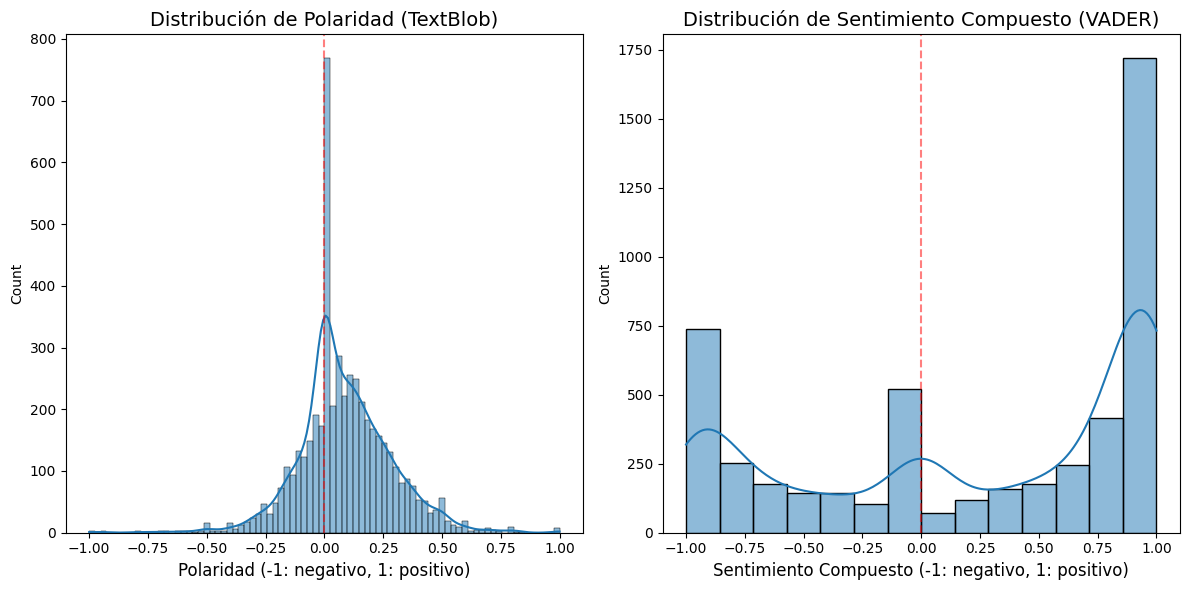

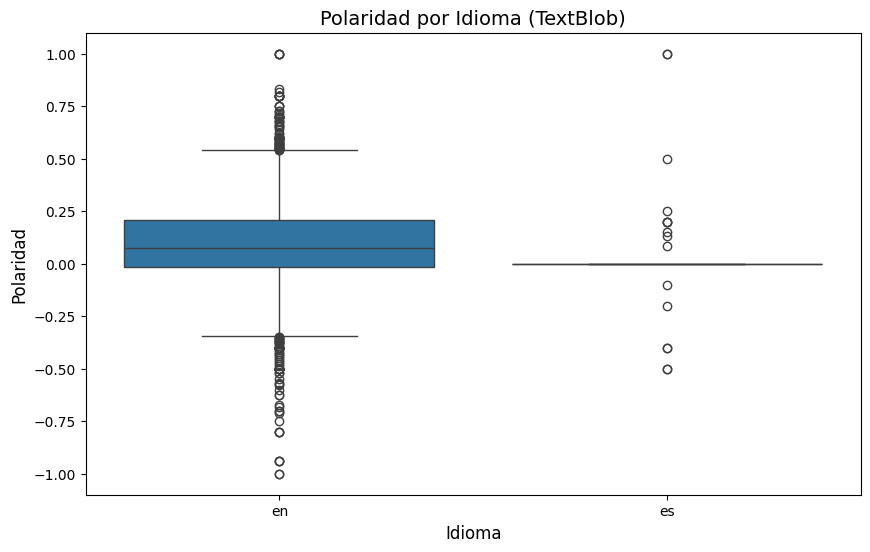

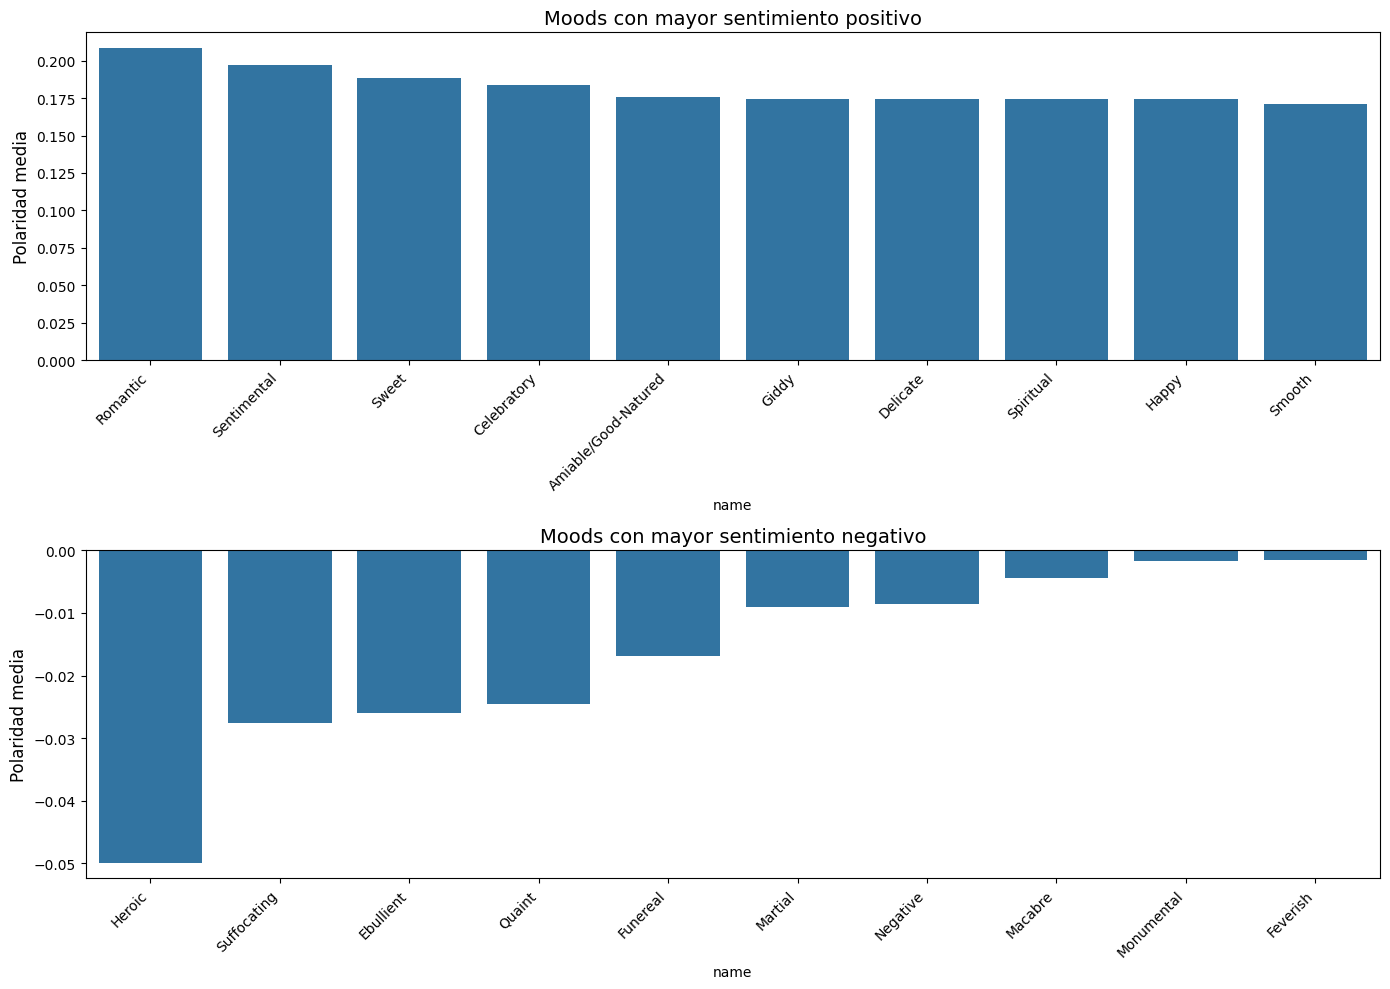

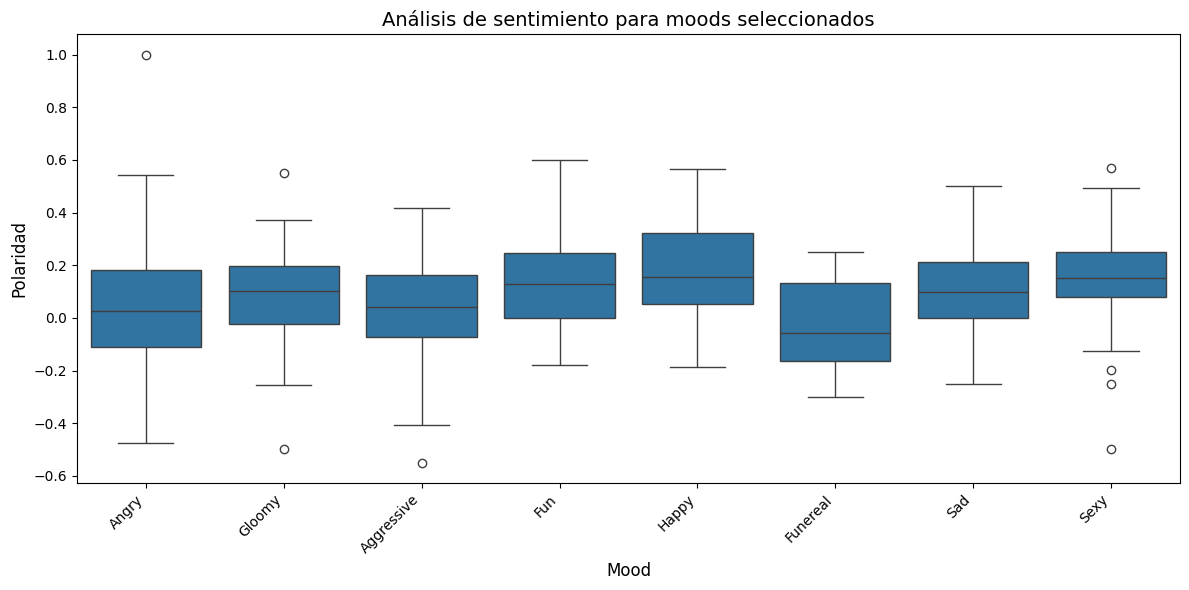


=== Contraste entre sentimiento y mood ===

Canciones etiquetadas como 'felices' pero con letras negativas:
- 'Triste' por Antônio Carlos Jobim (Mood: Cheerful, Polaridad: -1.00)
- 'Ghosts Again' por Depeche Mode (Mood: Funereal, Polaridad: -0.30)
- 'Enjoy the Silence' por Depeche Mode (Mood: Funereal, Polaridad: -0.25)

Canciones etiquetadas como 'tristes' pero con letras positivas:
- 'La Vie en Rose' por Édith Piaf (Mood: Gloomy, Polaridad: 0.55)
- 'He Stopped Loving Her Today' por Desconocido (Mood: Sad, Polaridad: 0.50)
- 'Wise Up' por Common (Mood: Sad, Polaridad: 0.42)
- 'You Win Again' por Hank Williams (Mood: Sad, Polaridad: 0.42)
- 'Billie's Blues' por Billie Holiday (Mood: Sad, Polaridad: 0.40)


In [51]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect, LangDetectException
import nltk
import re

# Descargar recursos necesarios
nltk.download('vader_lexicon')

# Función para detectar idioma
def detectar_idioma(texto):
    if pd.isna(texto) or texto == '':
        return 'unknown'
    try:
        return detect(texto)
    except LangDetectException:
        return 'unknown'

# Inicializar el analizador VADER
sid = SentimentIntensityAnalyzer()

# Función para calcular sentimiento con TextBlob (bueno para inglés y aceptable para español)
def analizar_sentimiento_textblob(texto):
    if pd.isna(texto) or texto == '':
        return {'polaridad': np.nan, 'subjetividad': np.nan}
    
    blob = TextBlob(texto)
    return {
        'polaridad': blob.sentiment.polarity,
        'subjetividad': blob.sentiment.subjectivity
    }

# Función para calcular sentimiento con VADER (optimizado para inglés)
def analizar_sentimiento_vader(texto):
    if pd.isna(texto) or texto == '':
        return {'negativo': np.nan, 'neutro': np.nan, 'positivo': np.nan, 'compuesto': np.nan}
    
    scores = sid.polarity_scores(texto)
    return {
        'negativo': scores['neg'],
        'neutro': scores['neu'],
        'positivo': scores['pos'],
        'compuesto': scores['compound']
    }

# Verificar que tenemos letras para analizar
print(f"Total de canciones: {len(df_songs)}")
print(f"Canciones con letras: {df_songs['lyrics'].notna().sum()}")

# Aplicar análisis de sentimiento a las letras
sentiment_data = []

# Filtrar solo canciones con letras
songs_with_lyrics = df_songs[df_songs['lyrics'].notna()]

for idx, row in songs_with_lyrics.iterrows():
    # Extraer datos básicos
    song_id = row['id']
    song_name = row['name'] if not pd.isna(row['name']) else "Desconocido"
    artist_name = row['artist'] if not pd.isna(row['artist']) else "Desconocido"
    
    # Detectar idioma
    idioma = detectar_idioma(row['lyrics'])
    
    # Analizar sentimiento con ambos métodos
    textblob_results = analizar_sentimiento_textblob(row['lyrics'])
    vader_results = analizar_sentimiento_vader(row['lyrics'])
    
    # Guardar resultados
    song_data = {
        'song_id': song_id,
        'title': song_name,
        'artist': artist_name,
        'language': idioma,
        'textblob_polarity': textblob_results['polaridad'],
        'textblob_subjectivity': textblob_results['subjetividad'],
        'vader_negative': vader_results['negativo'],
        'vader_neutral': vader_results['neutro'],
        'vader_positive': vader_results['positivo'],
        'vader_compound': vader_results['compuesto']
    }
    
    sentiment_data.append(song_data)

# Crear DataFrame con los resultados
df_sentiment = pd.DataFrame(sentiment_data)

# Mostrar resumen de los resultados
print("\n=== Resumen del Análisis de Sentimiento ===")
print(f"Canciones analizadas: {len(df_sentiment)}")
print("\nDistribución por idioma:")
print(df_sentiment['language'].value_counts())

print("\nEstadísticas de sentimiento (TextBlob):")
print(df_sentiment[['textblob_polarity', 'textblob_subjectivity']].describe())

print("\nEstadísticas de sentimiento (VADER - para inglés):")
print(df_sentiment[['vader_negative', 'vader_neutral', 'vader_positive', 'vader_compound']].describe())

# Visualizar distribución de polaridad
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_sentiment['textblob_polarity'], kde=True)
plt.title('Distribución de Polaridad (TextBlob)', fontsize=14)
plt.xlabel('Polaridad (-1: negativo, 1: positivo)', fontsize=12)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.histplot(df_sentiment['vader_compound'], kde=True)
plt.title('Distribución de Sentimiento Compuesto (VADER)', fontsize=14)
plt.xlabel('Sentimiento Compuesto (-1: negativo, 1: positivo)', fontsize=12)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Comparar sentimiento entre canciones en inglés y español
plt.figure(figsize=(10, 6))
sns.boxplot(x='language', y='textblob_polarity', data=df_sentiment[df_sentiment['language'].isin(['en', 'es'])])
plt.title('Polaridad por Idioma (TextBlob)', fontsize=14)
plt.xlabel('Idioma', fontsize=12)
plt.ylabel('Polaridad', fontsize=12)
plt.show()

# Relacionar el análisis de sentimiento con los moods
# Primero unimos la tabla de sentimiento con la tabla de moods
try:
    # Convertir song_id al mismo tipo para permitir el merge
    df_sentiment['song_id'] = df_sentiment['song_id'].astype(str)
    df_song_moods['song_id'] = df_song_moods['song_id'].astype(str)
    
    # Unir dataframes
    sentiment_with_moods = df_sentiment.merge(df_song_moods, left_on='song_id', right_on='song_id', how='inner')
    sentiment_with_moods = sentiment_with_moods.merge(df_moods, left_on='mood_id', right_on='id', how='inner')
    
    # Analizar los moods más emocionales
    # Visualizar los 10 moods con mayor polaridad positiva y negativa
    mood_sentiment = sentiment_with_moods.groupby('name')['textblob_polarity'].agg(['mean', 'count'])
    mood_sentiment = mood_sentiment[mood_sentiment['count'] >= 5]  # Al menos 5 canciones por mood
    
    # Top 10 moods más positivos
    top_positive = mood_sentiment.sort_values('mean', ascending=False).head(10)
    
    # Top 10 moods más negativos
    top_negative = mood_sentiment.sort_values('mean', ascending=True).head(10)
    
    # Visualizar
    plt.figure(figsize=(14, 10))
    
    plt.subplot(2, 1, 1)
    sns.barplot(x=top_positive.index, y='mean', data=top_positive.reset_index())
    plt.title('Moods con mayor sentimiento positivo', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Polaridad media', fontsize=12)
    
    plt.subplot(2, 1, 2)
    sns.barplot(x=top_negative.index, y='mean', data=top_negative.reset_index())
    plt.title('Moods con mayor sentimiento negativo', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Polaridad media', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Moods específicos del análisis anterior
    target_moods = ['Angry', 'Sad', 'Happy', 'Sexy', 'Aggressive', 'Fun', 'Gloomy']
    
    # Obtener estadísticas para estos moods
    special_moods = []
    
    for target in target_moods:
        matches = [m for m in sentiment_with_moods['name'] if target.lower() in m.lower()]
        if matches:
            special_moods.extend(matches)
    
    if special_moods:
        special_mood_data = sentiment_with_moods[sentiment_with_moods['name'].isin(special_moods)]
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='name', y='textblob_polarity', data=special_mood_data)
        plt.title('Análisis de sentimiento para moods seleccionados', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Mood', fontsize=12)
        plt.ylabel('Polaridad', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron moods específicos para analizar")
    
except Exception as e:
    print(f"Error al relacionar sentimiento con moods: {e}")

# Búsqueda de canciones con mayor contraste entre sentimiento y mood
try:
    # Ejemplo: Canciones "felices" con letra triste o viceversa
    happy_moods = sentiment_with_moods[sentiment_with_moods['name'].str.contains('Happy|Fun|Cheerful', case=False, regex=True)]
    sad_moods = sentiment_with_moods[sentiment_with_moods['name'].str.contains('Sad|Gloomy|Depressive', case=False, regex=True)]
    
    # Canciones "felices" con polaridad negativa
    happy_but_negative = happy_moods[happy_moods['textblob_polarity'] < -0.2].sort_values('textblob_polarity')
    
    # Canciones "tristes" con polaridad positiva
    sad_but_positive = sad_moods[sad_moods['textblob_polarity'] > 0.2].sort_values('textblob_polarity', ascending=False)
    
    print("\n=== Contraste entre sentimiento y mood ===")
    
    if not happy_but_negative.empty:
        print("\nCanciones etiquetadas como 'felices' pero con letras negativas:")
        for _, row in happy_but_negative.head(5).iterrows():
            print(f"- '{row['title']}' por {row['artist']} (Mood: {row['name']}, Polaridad: {row['textblob_polarity']:.2f})")
    
    if not sad_but_positive.empty:
        print("\nCanciones etiquetadas como 'tristes' pero con letras positivas:")
        for _, row in sad_but_positive.head(5).iterrows():
            print(f"- '{row['title']}' por {row['artist']} (Mood: {row['name']}, Polaridad: {row['textblob_polarity']:.2f})")
    
except Exception as e:
    print(f"Error al analizar contrastes: {e}")

# **Conclusiones sobre el análisis de moods y letras de Wendigo**

### 1. La distribución de moods en la colección:
- **Existe una diversidad mediana en la distribución de moods en la colección:** Cuenta con poco más de 300 moods diferentes.

- **Patrones de clasificación de moods en la colección:** Existe un desequilibrio en la asignación de moods, con algunas clasificaciones dominantes como *"Acerbic"*, *"Calm/Peaceful"* y *"Hungry"*, lo que refleja posibles tendencias en los criterios de categorización musical.

- **Co-ocurrencia de moods:** El análisis muestra asociaciones frecuentes entre ciertos estados de ánimo, como *"Poignant"* y *"Wistful"* o *"Cerebral"* y *"Complex"*, sugiriendo que estas emociones suelen experimentarse simultáneamente en las composiciones musicales.

### 2. Sobre el contenido de las letras:
- **Vocabulario distintivo por mood:** Cada mood presenta un conjunto de palabras características que emergen en sus letras. Por ejemplo, los moods agresivos contienen vocabulario más intenso y directo, mientras que los moods melancólicos presentan términos más reflexivos.

- **Limitaciones de datos:** Solo un 8.9% de las canciones en la base de datos contienen letras completas, lo que limita el alcance del análisis textual pero aún permite identificar patrones significativos.

- **Diferencias lingüísticas:** Se observaron diferencias en la expresión emocional entre letras en inglés y español, con variaciones en la intensidad y los recursos lingüísticos empleados para transmitir estados de ánimo similares.

### 3. Sobre el análisis de sentimiento:
- **Correlación mood-sentimiento:** Existe una correlación general entre la categorización de moods y el sentimiento expresado en las letras. Por ejemplo, moods etiquetados como "Happy" o "Fun" tienden a mostrar mayor polaridad positiva en su análisis de sentimiento.

- **Contrastes interesantes:** Se identificaron casos notables donde el sentimiento expresado en las letras contrasta con la categorización del mood. Estas discrepancias revelan la complejidad emocional de ciertas composiciones, donde la música puede transmitir una emoción mientras la letra comunica otra.

- **Variabilidad dentro de los moods:** Los análisis de boxplot muestran considerable variabilidad en el sentimiento dentro de cada categoría de mood, lo que sugiere que la expresión emocional en la música trasciende categorizaciones simples.

### 4. Implicaciones y aplicaciones:
- **Curaduría musical mejorada:** Los resultados pueden aplicarse a sistemas de recomendación musical que consideren no solo el género o el artista, sino también el estado emocional deseado por el usuario, cómo Wendigo.

- **Análisis cultural:** Las diferencias observadas entre idiomas y la expresión emocional proporcionan una ventana hacia aspectos culturales en la música y su comunicación emocional.

- **Comprensión de la disonancia lírica:** El análisis de contrastes entre música feliz con letras tristes (o viceversa) ofrece perspectivas sobre técnicas artísticas que utilizan esta yuxtaposición para generar impacto emocional.

### 5. Limitaciones y trabajo futuro:
- **Representatividad de la muestra:** La limitada disponibilidad de letras completas sugiere la necesidad de ampliar la base de datos para obtener conclusiones más robustas.

- **Contexto musical ausente:** El análisis se centra en las letras, pero no considera elementos musicales como melodía, armonía o ritmo, que son fundamentales en la transmisión emocional.

- **Expansión multimodal:** Un análisis futuro podría integrar características acústicas (tempo, tonalidad, instrumentación) con el análisis de letras para una comprensión más completa de la relación entre música y emoción.

- **Análisis temporal:** Sería valioso explorar cómo han evolucionado las expresiones emocionales en la música a lo largo del tiempo, identificando tendencias históricas en la expresión de diferentes moods.

Este proyecto demuestra el potencial del análisis de datos para profundizar en la comprensión de la expresión emocional en la música, revelando patrones que pueden enriquecer tanto la apreciación artística como las aplicaciones prácticas en sistemas de recomendación y clasificación musical.